In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [84]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

Data with knowledge

In [85]:
data = pd.read_csv('../data/03_Processed/02_ProcessedData.csv')
data_mapped = data.copy()
data_mapped['Participation'] = data_mapped['Participation'].map({'Project':0.0,'Project+organization':1.0 })
data_mapped = data_mapped.drop('ID', axis=1)

,Participation,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
0,1.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,0.0,3.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,2.0,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,...,2.0,3.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0
3,1.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,3.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,2.0,0.0
4,1.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,...,3.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
5,1.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,3.0,4.0,2.0,0.0,2.0,0.0,2.0,3.0,2.0,0.0
6,0.0,2.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
7,0.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
8,0.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,0.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,...,1.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0


c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

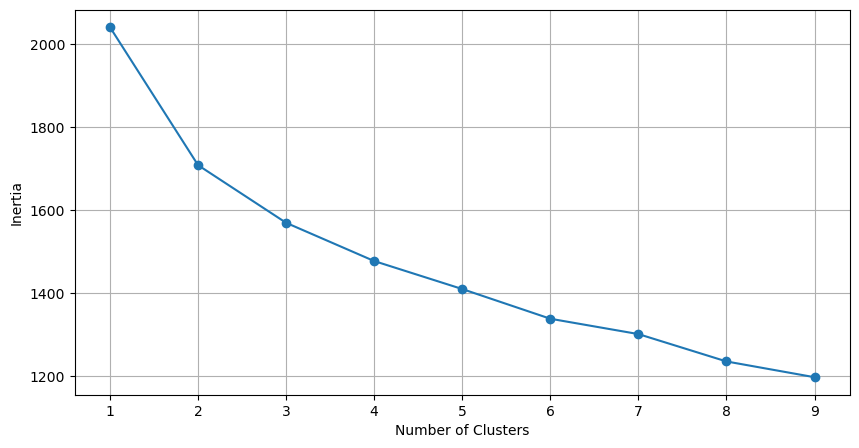

In [86]:
optimise_k_means(data_mapped, 10)

In [87]:
kmeans = KMeans(n_clusters=6)

In [88]:
kmeans.fit(data_mapped)

c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [89]:
data_mapped['kmeans_6'] = kmeans.labels_

In [90]:
data_mapped_cluster_assignment = data_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów:")
for cluster, members in data_mapped_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")


Przypisanie obiektów do klastrów:
Klaster 0: [6, 7, 9, 12, 13, 14, 16, 18, 20, 24, 25, 31, 33, 35, 37, 38, 39, 42, 43, 44, 46, 48, 49, 50, 51, 52, 55, 57, 58]
Klaster 1: [4, 11, 19, 28]
Klaster 2: [2, 10, 21, 34, 40]
Klaster 3: [29, 36, 47, 54]
Klaster 4: [0, 1, 3, 5, 8, 15, 22, 27, 30, 41, 56]
Klaster 5: [17, 23, 26, 32, 45, 53]


Data without knowledge

In [91]:
datawithoutknowledge = pd.read_csv('../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv')
datawithoutknowledge_mapped = datawithoutknowledge.copy()
datawithoutknowledge_mapped['Participation'] = datawithoutknowledge_mapped['Participation'].map({'Project':0.0,'Project+organization':1.0 })
datawithoutknowledge_mapped = datawithoutknowledge_mapped.drop('ID', axis=1)

,Participation,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,Area: NLP,Area: Computer Vision,Project Management,Promocja w Social Media,Ux/Ui,Projektowanie graficzne,Nawiązywanie Relacji z Biznesem,Nawiązywanie Relacji z naukowcami,Pozyskiwanie finansowania,Współpraca z administracją UEW
0,1.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,...,2.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0
1,0.0,3.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0
4,1.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,...,3.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0
5,1.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,2.0,2.0,3.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0
6,0.0,2.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,1.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
7,0.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,...,2.0,2.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0
9,0.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0


c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

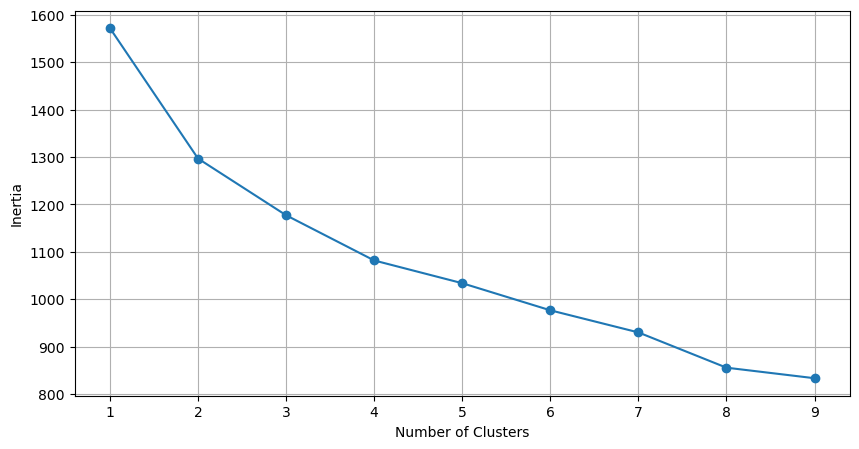

In [92]:
optimise_k_means(datawithoutknowledge_mapped, 10)

In [93]:
kmeans_without = KMeans(n_clusters=3)

In [94]:
kmeans.fit(datawithoutknowledge_mapped)

c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [95]:
datawithoutknowledge_mapped['kmeans_6'] = kmeans.labels_

In [96]:
datawithoutknowledge_mapped_cluster_assignment = datawithoutknowledge_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów:")
for cluster, members in datawithoutknowledge_mapped_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")


Przypisanie obiektów do klastrów:
Klaster 0: [2, 10, 13, 20, 21, 34, 37, 40, 57]
Klaster 1: [1, 3, 4, 5, 8, 19, 22, 27, 30, 41]
Klaster 2: [11, 17, 23, 26, 28, 32, 45]
Klaster 3: [6, 7, 18, 31, 33, 38, 42, 44, 46, 48, 49, 50, 53, 58]
Klaster 4: [0, 15, 29, 36, 47, 54, 56]
Klaster 5: [9, 12, 14, 16, 24, 25, 35, 39, 43, 51, 52, 55]
